In [1]:
from ondepi.applications import price_level as pl
from ondepi.visualisations import sample as plot_sample
from ondepi.resources import utils

In [2]:
symbol = 'INTC'
date = '2019-01-31'
price_level = 466000
direction = 1
std_size = 500
t0 = 1.05e3
t1 = 1.50e3
reset_time_origin = True

In [3]:
queue = pl.init_queue_on_lobster_data(
    symbol=symbol, date=date,
    price_level=price_level, direction=direction, std_size=std_size,
    t0=t0, t1=t1, reset_time_origin=reset_time_origin
)

symbol: INTC
date: 2019-01-31
direction: 1
price_level: 466000
std_size: 500
reset_time_origin: True


In [4]:
queue = pl.set_param(queue)

In [5]:
df_sample = queue.get_df_sample()

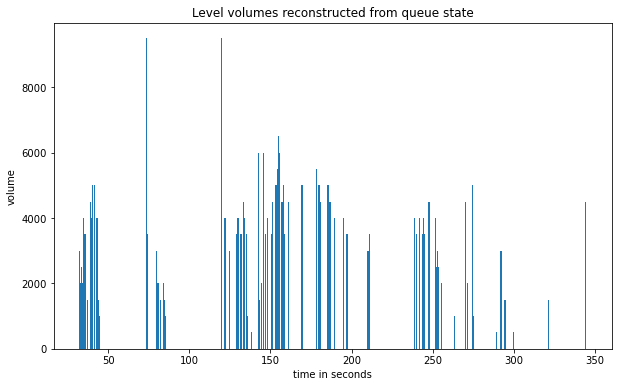

In [6]:
ax = plot_sample.plot_reconstructed_volumes(df_sample, std_size=std_size, time_range=None)

In [7]:
queue.simulate(max_time=1.0e3, max_events=100, first_event=1, first_state=5)

In [8]:
df = queue.get_df_sample()

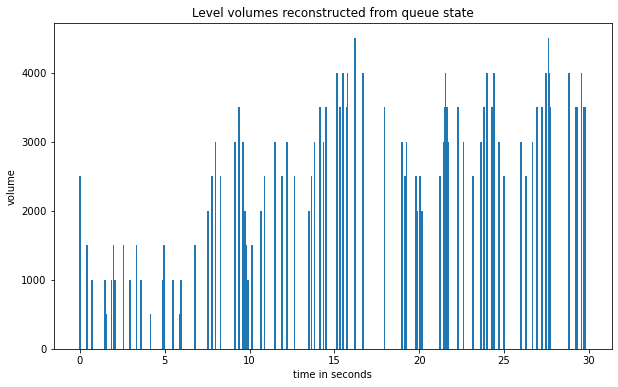

In [21]:
ax = plot_sample.plot_reconstructed_volumes(df, std_size=std_size, time_range=None, width=1.0e-1)

In [11]:
queue.filter(dt=7.5e-3, num_states=30)

In [12]:
df = pl.produce_df_detection(queue, beta=150.5)

In [13]:
df.describe()

,idx,time sample,time filter,state,expected val,predictor,error
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,15740.868687,15.741333,15.741333,5.232323,6.194570,6.201552,-0.969229
std,9391.000712,9.390991,9.390991,2.165727,1.835702,1.833841,1.131079
min,0.000000,0.000000,0.000000,0.000000,2.281232,2.349533,-3.242551
25%,7892.500000,7.892913,7.892913,4.000000,4.794568,4.794568,-1.704798
50%,15495.000000,15.495295,15.495295,6.000000,6.543122,6.543122,-1.013828
75%,24151.500000,24.151777,24.151777,7.000000,7.807838,7.809945,-0.212531
max,29808.000000,29.808748,29.808748,9.000000,8.614630,8.614630,2.170249


<AxesSubplot:title={'center':'Level volumes reconstructed from queue state and their expected values'}, xlabel='time in seconds', ylabel='volume'>

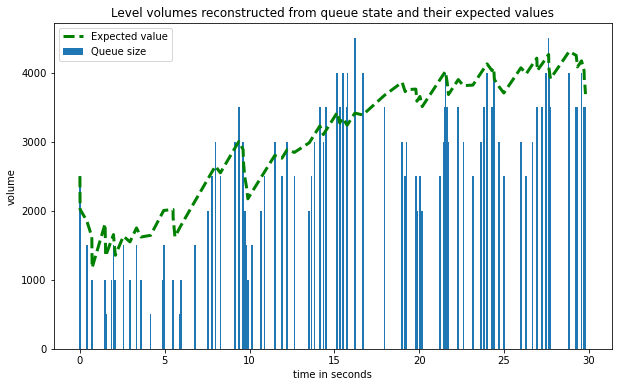

In [20]:
plot_sample.plot_df_detection(df, std_size=std_size, width=1.e-1)

In [15]:
df_intensity = queue.get_df_intensity_process()

<AxesSubplot:xlabel='time'>

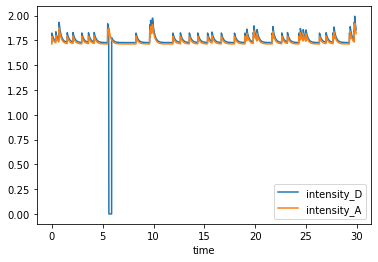

In [16]:
df_intensity.set_index('time')[['intensity_D', 'intensity_A']].plot()